In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil

source_folder = '/content/drive/MyDrive/CS5242/frames/test'
destination_folder = '/content/test'

shutil.copytree(source_folder, destination_folder)

'/content/test'

In [3]:
source_folder = '/content/drive/MyDrive/CS5242/frames/train'
destination_folder = '/content/train'
shutil.copytree(source_folder, destination_folder)

'/content/train'

# Import packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Hyperparameter

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_data_dir = '/content/train'
test_data_dir = '/content/test'

# Load Dataset

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 21414 files belonging to 2 classes.
Using 14990 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 21414 files belonging to 2 classes.
Using 6424 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['norm', 'weap']


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 4053 files belonging to 2 classes.


# Show dataset

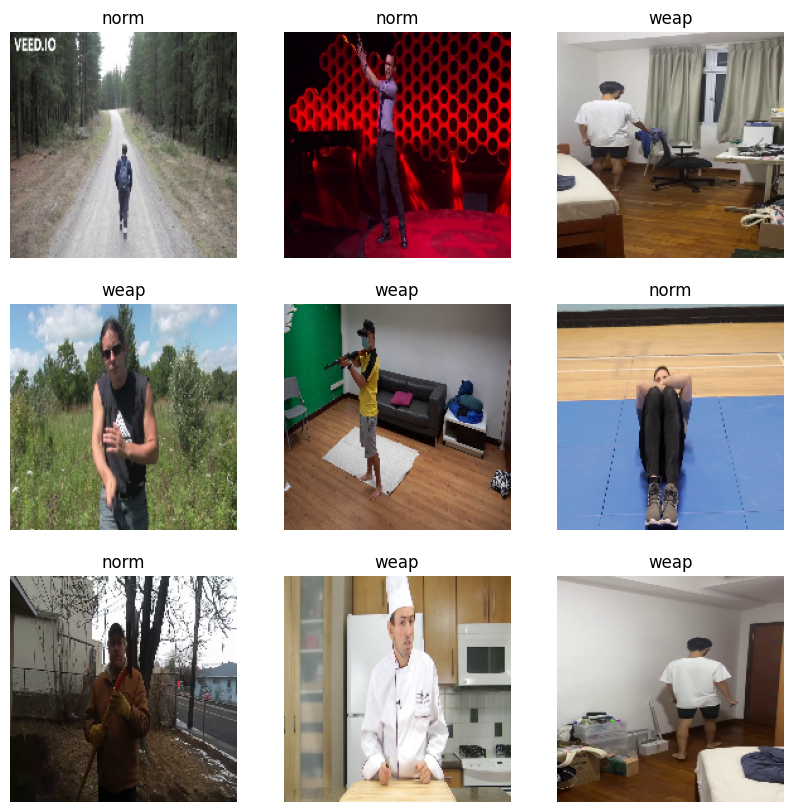

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Check shape of images

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Resnet50

## Build model

In [ ]:
num_classes = len(class_names)
num_classes

2

In [ ]:
IMG_SHAPE = (img_height, img_width, 3)

base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                        include_top=False,
                        weights='imagenet')
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes)(x)
model_ResNet50 = tf.keras.Model(inputs, outputs)

model_ResNet50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Show model structure

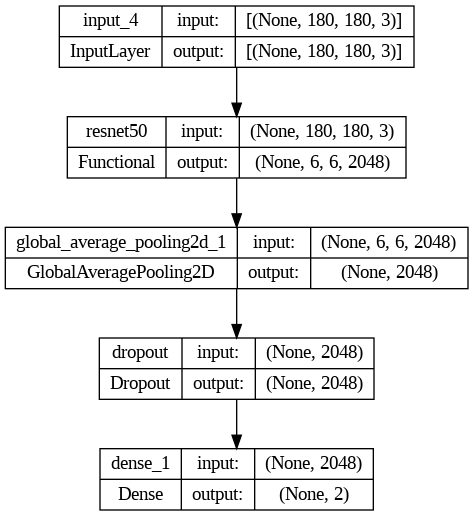

In [ ]:
tf.keras.utils.plot_model(model_ResNet50,show_shapes=True)

## Model training

In [ ]:
epochs=10
history = model_ResNet50.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
469/469 [==============================] - 999s 2s/step - loss: 0.6625 - accuracy: 0.6851 - val_loss: 0.5120 - val_accuracy: 0.7551
Epoch 2/10
469/469 [==============================] - 991s 2s/step - loss: 0.4256 - accuracy: 0.8020 - val_loss: 0.3563 - val_accuracy: 0.8464
Epoch 3/10
469/469 [==============================] - 994s 2s/step - loss: 0.3242 - accuracy: 0.8605 - val_loss: 0.3294 - val_accuracy: 0.8562
Epoch 4/10
469/469 [==============================] - 989s 2s/step - loss: 0.2400 - accuracy: 0.9019 - val_loss: 0.2927 - val_accuracy: 0.8815
Epoch 5/10
469/469 [==============================] - 936s 2s/step - loss: 0.1999 - accuracy: 0.9221 - val_loss: 0.2839 - val_accuracy: 0.8871
Epoch 6/10
469/469 [==============================] - 936s 2s/step - loss: 0.1584 - accuracy: 0.9382 - val_loss: 0.2561 - val_accuracy: 0.9071
Epoch 7/10
469/469 [==============================] - 934s 2s/step - loss: 0.1269 - accuracy: 0.9515 - val_loss: 0.2944 - val_accuracy: 0.8839

In [ ]:
model_ResNet50.evaluate(test_ds)[1]

127/127 [==============================] - 155s 1s/step - loss: 1.5546 - accuracy: 0.6383


0.6382926106452942

## Save model

In [ ]:
model_ResNet50.save("Resnet50.h5")

### Show training process

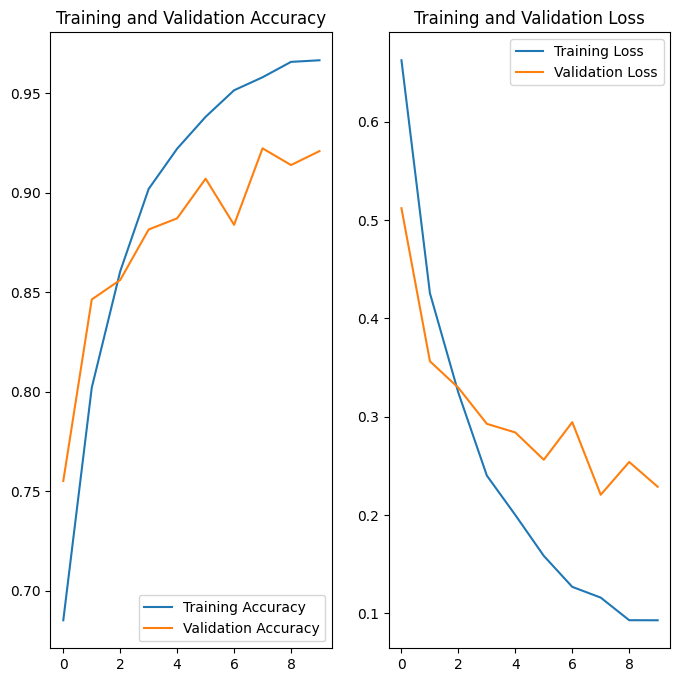

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Show Report and Confusion Matrix 

In [ ]:
predict_list = []
label_list = []
for image_batch, labels_batch in test_ds:
  predict_score = model_ResNet50.predict(image_batch)
  predict_label = np.argmax(predict_score,axis=1)

  predict_list.append(predict_label)
  label_list.append(labels_batch.numpy())
  # print(image_batch.shape)
  # print(labels_batch.shape)
  # print(predict_score)
  # print(labels_batch.numpy())
  # print(predict_label)
  # print(predict_list)
  # print(label_list)
  # break
predict_array = np.hstack(predict_list)
label_array = np.hstack(label_list)

1/1 [==============================] - 2s 2s/step


In [ ]:
predict_array[:10], label_array[:10]

(array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1]),
 array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int32))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_array, predict_array, target_names=class_names, digits=3))

              precision    recall  f1-score   support

        norm      0.660     0.445     0.532      1862
        weap      0.631     0.805     0.707      2191

    accuracy                          0.640      4053
   macro avg      0.645     0.625     0.619      4053
weighted avg      0.644     0.640     0.626      4053



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_array, predict_array)

array([[ 829, 1033],
       [ 428, 1763]])

In [ ]:

cnf_matrix = confusion_matrix(label_array, predict_array)
cnf_matrix

array([[ 829, 1033],
       [ 428, 1763]])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

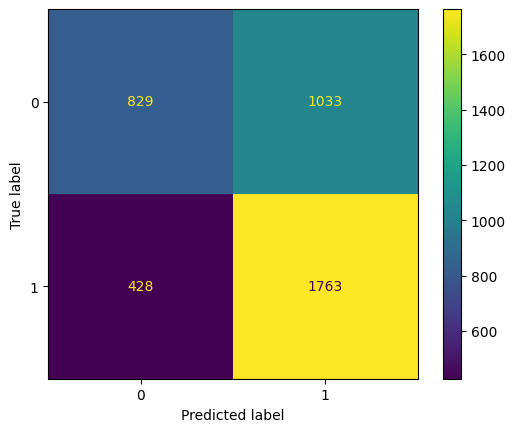

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
cm_display.plot()
plt.show()

## 热力图可视化

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

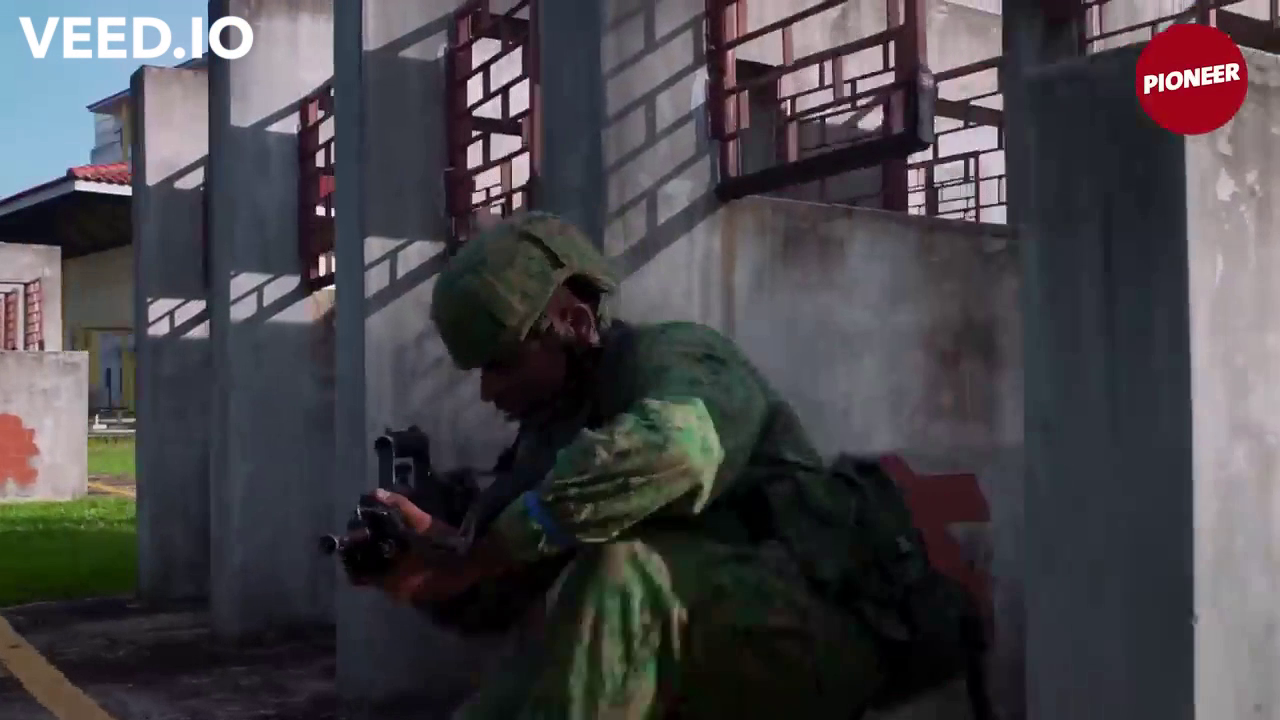

In [ ]:
model_builder = keras.applications.ResNet50
img_size = (224, 224)
preprocess_input = keras.applications.resnet50.preprocess_input
decode_predictions = keras.applications.resnet50.decode_predictions

last_conv_layer_name = 'conv5_block3_3_conv'

# # The local path to our target image
# img_path = keras.utils.get_file(
#     "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
# )

img_path = '/content/train/weap/1(LEE KANG WEI)_140.png'

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))




In [ ]:
grad_model = tf.keras.models.Model(
    [base_model.inputs], [base_model.get_layer(last_conv_layer_name).output, base_model.output]
)

1/1 [==============================] - 54s 54s/step


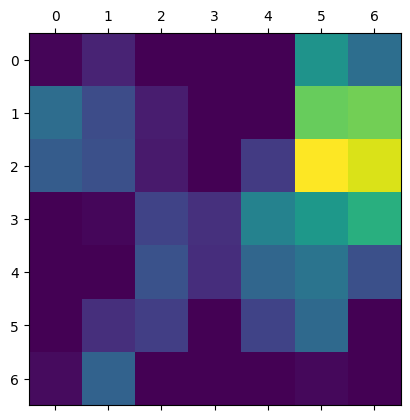

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-66-997c03bb4fa8>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


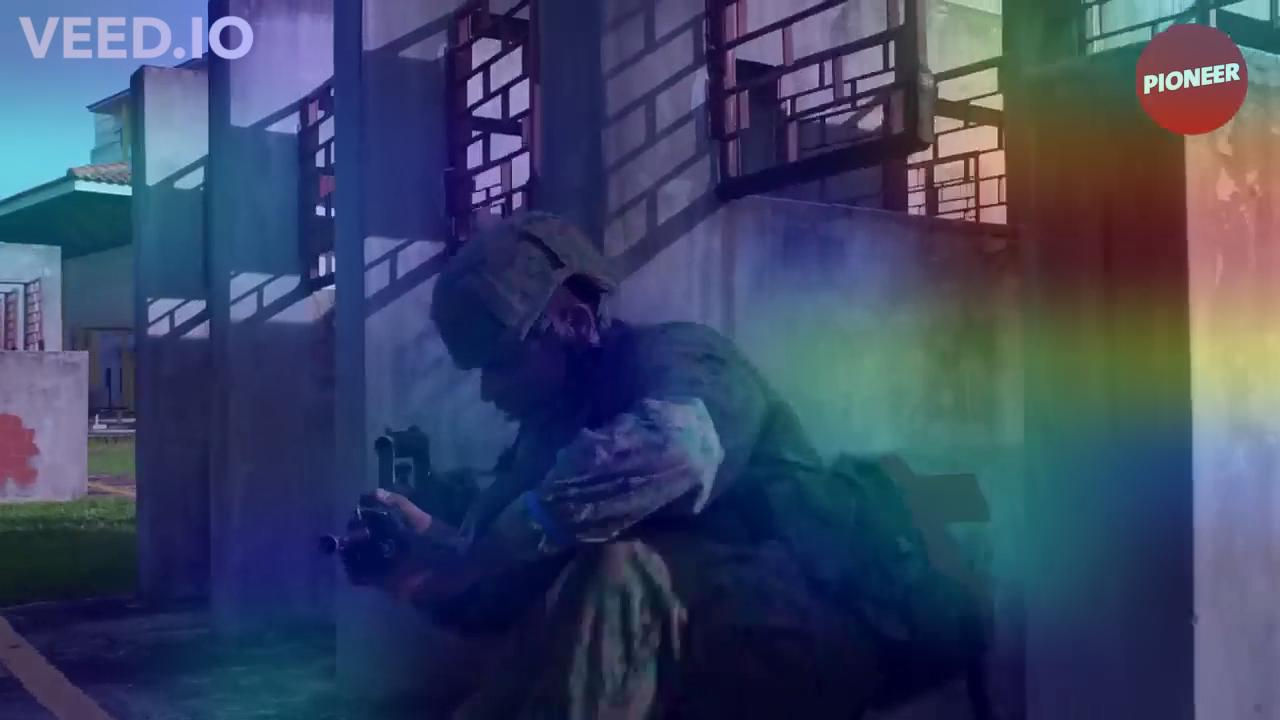

In [ ]:
save_and_display_gradcam(img_path, heatmap)